# Binary Classification Model with PyTorch



Let's import dependencies

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [26]:
x, y = make_circles(
    n_samples=1000,
    noise=0.03,
    random_state=42,
    shuffle=True)

In [27]:
len(x), len(y)

(1000, 1000)

In [28]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

The data obtained from sklearn.datasets.make_circles is a numpy array. However, we need tensors for PyTorch. Hence, we will convert the numpy arrays to torch tensors.

In [29]:
X_tensor = torch.from_numpy(x).type(torch.float)
Y_tensor = torch.from_numpy(y).type(torch.float)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_tensor,
    Y_tensor,
    test_size=0.2,
    random_state=42
)

We can visualize our data in order to understand the relationships and distribution

In [31]:
X_train[:10]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994],
        [-0.8837, -0.4678],
        [-0.3836,  0.6987],
        [ 0.6047,  0.5163],
        [-0.5869,  0.7804],
        [ 0.8833, -0.5178]])

In [32]:
import pandas as pd
pd.DataFrame({"X1": X_train[:,0], "X2": X_train[:,1]}).head(5)

,X1,X2
0,0.657946,-0.465081
1,0.631949,-0.734663
2,-1.008616,-0.124031
3,-0.966575,-0.225622
4,-0.166590,0.799446


Matplotlib only takes numpy and not tensors. So, we will use the nparray.

<function matplotlib.pyplot.legend(*args, **kwargs)>

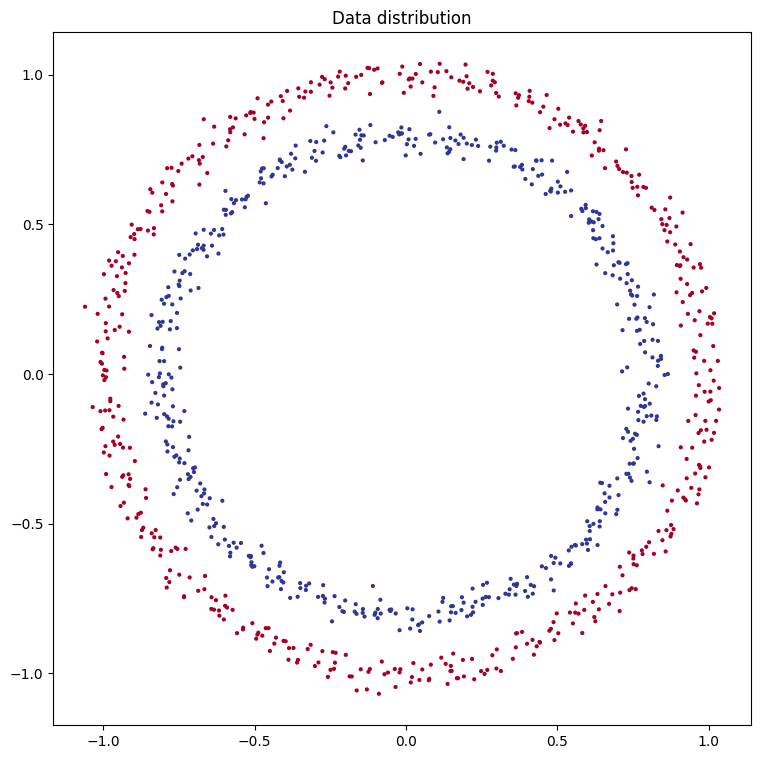

In [33]:
plt.figure(figsize=(9,9))
plt.scatter(x = x[:,0], y=x[:, 1], s=4, c=y, cmap=plt.cm.RdYlBu)
plt.title("Data distribution")
plt.legend

We can proceed to build a model that is able to classify points in the red circles/points from points in the blue circle

In [34]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=2, out_features= 10)
    self.linear_layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.linear_layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_3(self.linear_layer_2(self.linear_layer(x)))


In [35]:
# Let's setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [36]:
torch.manual_seed(42)
model_0 = BinaryClassifier()

In [37]:
model_0.parameters()

<generator object Module.parameters at 0x7b5bb8842c70>

In [38]:
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [39]:
model_0.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('linear_layer.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('linear_layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.25

Now we can train and test our model

In [40]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

In [41]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [46]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy_score = (correct / len(y_true))
  return accuracy_score

In [52]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss = []
loss_test = []
acc_train = []
acc_test = []

for epoch in tqdm(range(epochs)):
  model_0.train()

  y_logits = model_0(X_train).squeeze() # the raw outputs are logits

  # Let's obtain prediction probabilities
  y_preds = torch.round(torch.sigmoid(y_logits)) # torch.sigmoid() gives us the prediction probabilities. torch.round() allows us gain 0 or 1 as predicted label values

  # Calculate the loss
  loss = loss_fn(y_logits, Y_train) # We are using logits because our loss function (BCEWithLogitsLoss requires logits)

  # Zero te gradients to prevent gradient accummulation
  optimizer.zero_grad()

  # Perform back propagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

  # Let's test the model
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()

    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, Y_test)

  if epoch % 20 == 0:
    train_acc = accuracy_fn(y_true = Y_train, y_pred = y_preds)
    test_acc = accuracy_fn(y_true = Y_test, y_pred = test_preds)
    epoch_count.append(epoch)
    train_loss.append(loss.detach().numpy())
    loss_test.append(test_loss.detach().numpy())
    acc_train.append(train_acc)
    acc_test.append(test_acc)
    print(f"Train Loss: {loss} | Train accuracy: {train_acc * 100}% | Test Loss: {test_loss} | Test accuracy: {test_acc * 100}%")


  0%|          | 0/200 [00:00<?, ?it/s]

Train Loss: 0.6930486559867859 | Train accuracy: 50.5% | Test Loss: 0.6937784552574158 | Test accuracy: 49.0%
Train Loss: 0.6930453777313232 | Train accuracy: 50.625% | Test Loss: 0.693796694278717 | Test accuracy: 47.5%
Train Loss: 0.6930422186851501 | Train accuracy: 50.24999999999999% | Test Loss: 0.6938144564628601 | Test accuracy: 47.0%
Train Loss: 0.6930391788482666 | Train accuracy: 50.74999999999999% | Test Loss: 0.6938319206237793 | Test accuracy: 47.0%
Train Loss: 0.6930363178253174 | Train accuracy: 51.0% | Test Loss: 0.6938490867614746 | Test accuracy: 47.0%
Train Loss: 0.6930336952209473 | Train accuracy: 50.875% | Test Loss: 0.6938660144805908 | Test accuracy: 47.0%
Train Loss: 0.6930310726165771 | Train accuracy: 50.875% | Test Loss: 0.6938825249671936 | Test accuracy: 46.0%
Train Loss: 0.6930286288261414 | Train accuracy: 50.74999999999999% | Test Loss: 0.6938987970352173 | Test accuracy: 45.0%
Train Loss: 0.6930263042449951 | Train accuracy: 50.875% | Test Loss: 0.6939

Let's visualize the loss curves and accuracy scores

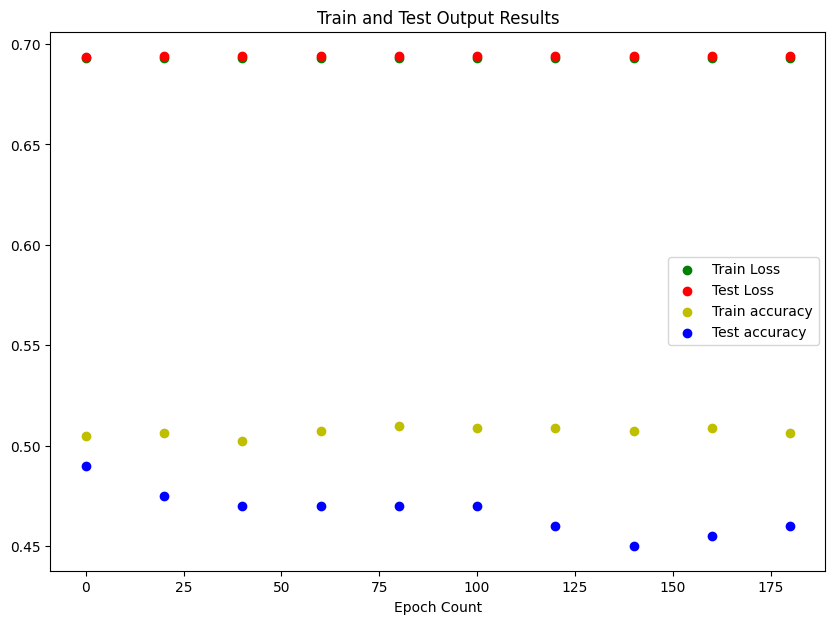

In [53]:
plt.figure(figsize=(10,7))

plt.scatter(epoch_count, train_loss, c = "g", label= "Train Loss")
plt.scatter(epoch_count, loss_test, c="r", label= "Test Loss")
plt.scatter(epoch_count, acc_train, c = "y", label= "Train accuracy")
plt.scatter(epoch_count, acc_test, c = "b", label= "Test accuracy")
plt.title("Train and Test Output Results")
plt.xlabel("Epoch Count")
plt.legend()
plt.show()

From our data, we can see that the linear model has not given a good result. Hence, we will view the decision boundary in order to gain insight on how to improve the model.

In [55]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading file: helper_functions.py")
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [56]:
from helper_functions import plot_predictions, plot_decision_boundary


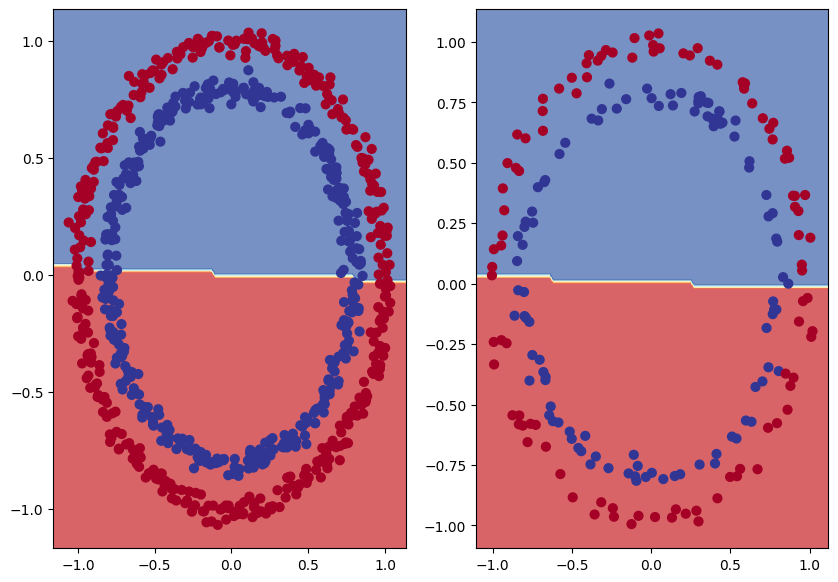

In [59]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_0, X_test, Y_test)

From the decision boundary plotted, we can see that the linear model does not fit the model well. Hence, we will introduce non-linear activation functions.


In [61]:
X_train.shape

torch.Size([800, 2])

In [131]:
class BinaryClassifier_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [132]:
torch.manual_seed(42)
model_1 = BinaryClassifier_2()

In [133]:
model_1

BinaryClassifier_2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [134]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [135]:
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [136]:
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [137]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

a, b = make_circles(
    n_samples=1000,
    noise=0.03,
    random_state=42,
    shuffle=True)

A_tensor = torch.from_numpy(a).type(torch.float)
B_tensor = torch.from_numpy(b).type(torch.float)

A_train, A_test, B_train, B_test = train_test_split(
    A_tensor,
    B_tensor,
    test_size=0.2,
    random_state=42
)

In [138]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 1000

epoch_count = []
train_loss = []
loss_test = []
acc_train = []
acc_test = []

for epoch in tqdm(range(epochs)):
  model_1.train()

  y_logits = model_1(A_train).squeeze() # the raw outputs are logits

  # Let's obtain prediction probabilities
  y_preds = torch.round(torch.sigmoid(y_logits)) # torch.sigmoid() gives us the prediction probabilities. torch.round() allows us gain 0 or 1 as predicted label values

  # Calculate the loss
  loss = loss_fn(y_logits, B_train) # We are using logits because our loss function (BCEWithLogitsLoss requires logits)

  # Zero te gradients to prevent gradient accummulation
  optimizer.zero_grad()

  # Perform back propagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

  # Let's test the model
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(A_test).squeeze()

    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, B_test)

  if epoch % 100 == 0:
    train_acc = accuracy_fn(y_true = B_train, y_pred = y_preds)
    test_acc = accuracy_fn(y_true = B_test, y_pred = test_preds)
    epoch_count.append(epoch)
    train_loss.append(loss.detach().numpy())
    loss_test.append(test_loss.detach().numpy())
    acc_train.append(train_acc)
    acc_test.append(test_acc)
    print(f"Epoch: {epoch} | Train Loss: {loss} | Train accuracy: {train_acc * 100}% | Test Loss: {test_loss} | Test accuracy: {test_acc * 100}%")

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.6929463148117065 | Train accuracy: 50.0% | Test Loss: 0.6931881904602051 | Test accuracy: 50.0%
Epoch: 100 | Train Loss: 0.6911528706550598 | Train accuracy: 52.87500000000001% | Test Loss: 0.6910240054130554 | Test accuracy: 52.5%
Epoch: 200 | Train Loss: 0.6897743940353394 | Train accuracy: 53.37499999999999% | Test Loss: 0.6893961429595947 | Test accuracy: 55.00000000000001%
Epoch: 300 | Train Loss: 0.687949538230896 | Train accuracy: 53.0% | Test Loss: 0.6872316598892212 | Test accuracy: 56.00000000000001%
Epoch: 400 | Train Loss: 0.6851678490638733 | Train accuracy: 52.75% | Test Loss: 0.684114933013916 | Test accuracy: 56.49999999999999%
Epoch: 500 | Train Loss: 0.6810224652290344 | Train accuracy: 52.75% | Test Loss: 0.6794120669364929 | Test accuracy: 56.49999999999999%
Epoch: 600 | Train Loss: 0.675148606300354 | Train accuracy: 54.50000000000001% | Test Loss: 0.6728507280349731 | Test accuracy: 56.00000000000001%
Epoch: 700 | Train Loss: 0.66658860445

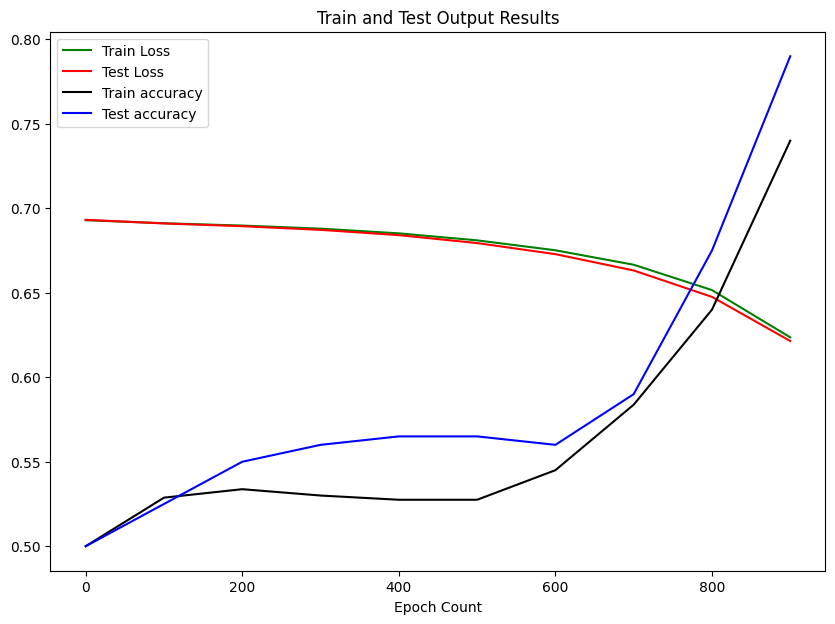

In [143]:
plt.figure(figsize=(10,7))

plt.plot(epoch_count, train_loss, c = "g", label= "Train Loss")
plt.plot(epoch_count, loss_test, c="r", label= "Test Loss")
plt.plot(epoch_count, acc_train, c = "black", label= "Train accuracy")
plt.plot(epoch_count, acc_test, c = "b", label= "Test accuracy")
plt.title("Train and Test Output Results")
plt.xlabel("Epoch Count")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Test Data')

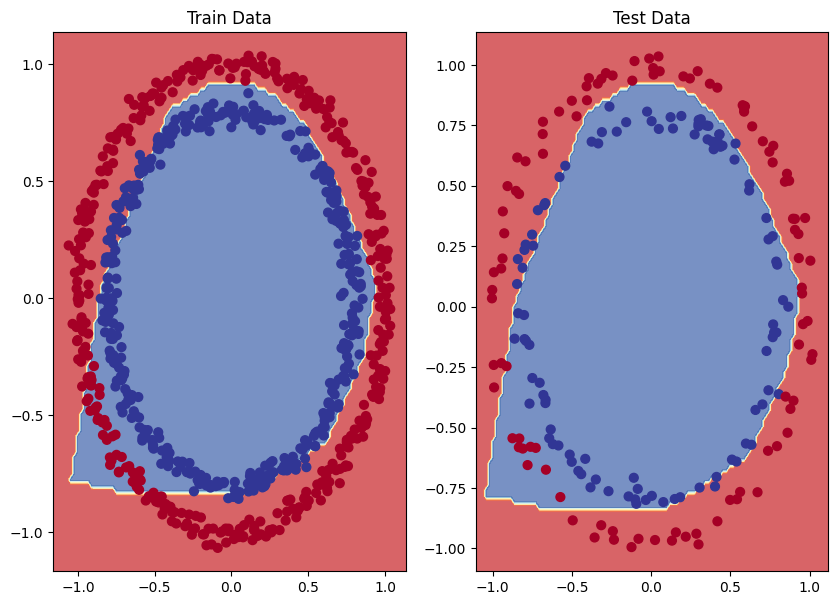

In [145]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_decision_boundary(model_1, A_train, B_train)
plt.title("Train Data")
plt.subplot(1,2,2)
plot_decision_boundary(model_1, A_test, B_test)
plt.title("Test Data")